In [118]:
# Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
data=pd.read_csv('C:/Users/ADMIN/Downloads/Iris.csv') # Loading dataset 
data.head() # Printing first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
data.shape # Dimension of dataset

(150, 6)

In [121]:
data.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [122]:
data['Species'].value_counts() # Total count of each flower species

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [123]:
data.isna().sum() # Check NULL values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [124]:
data.duplicated().sum() # Check duplicate entries

0

# Data Visualization

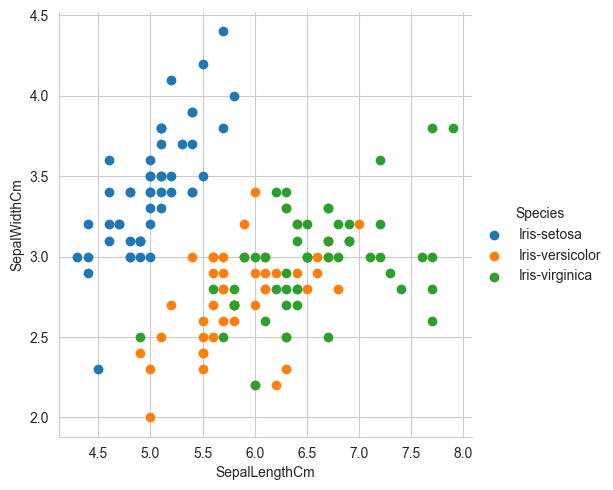

In [125]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue='Species', height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();
plt.show()

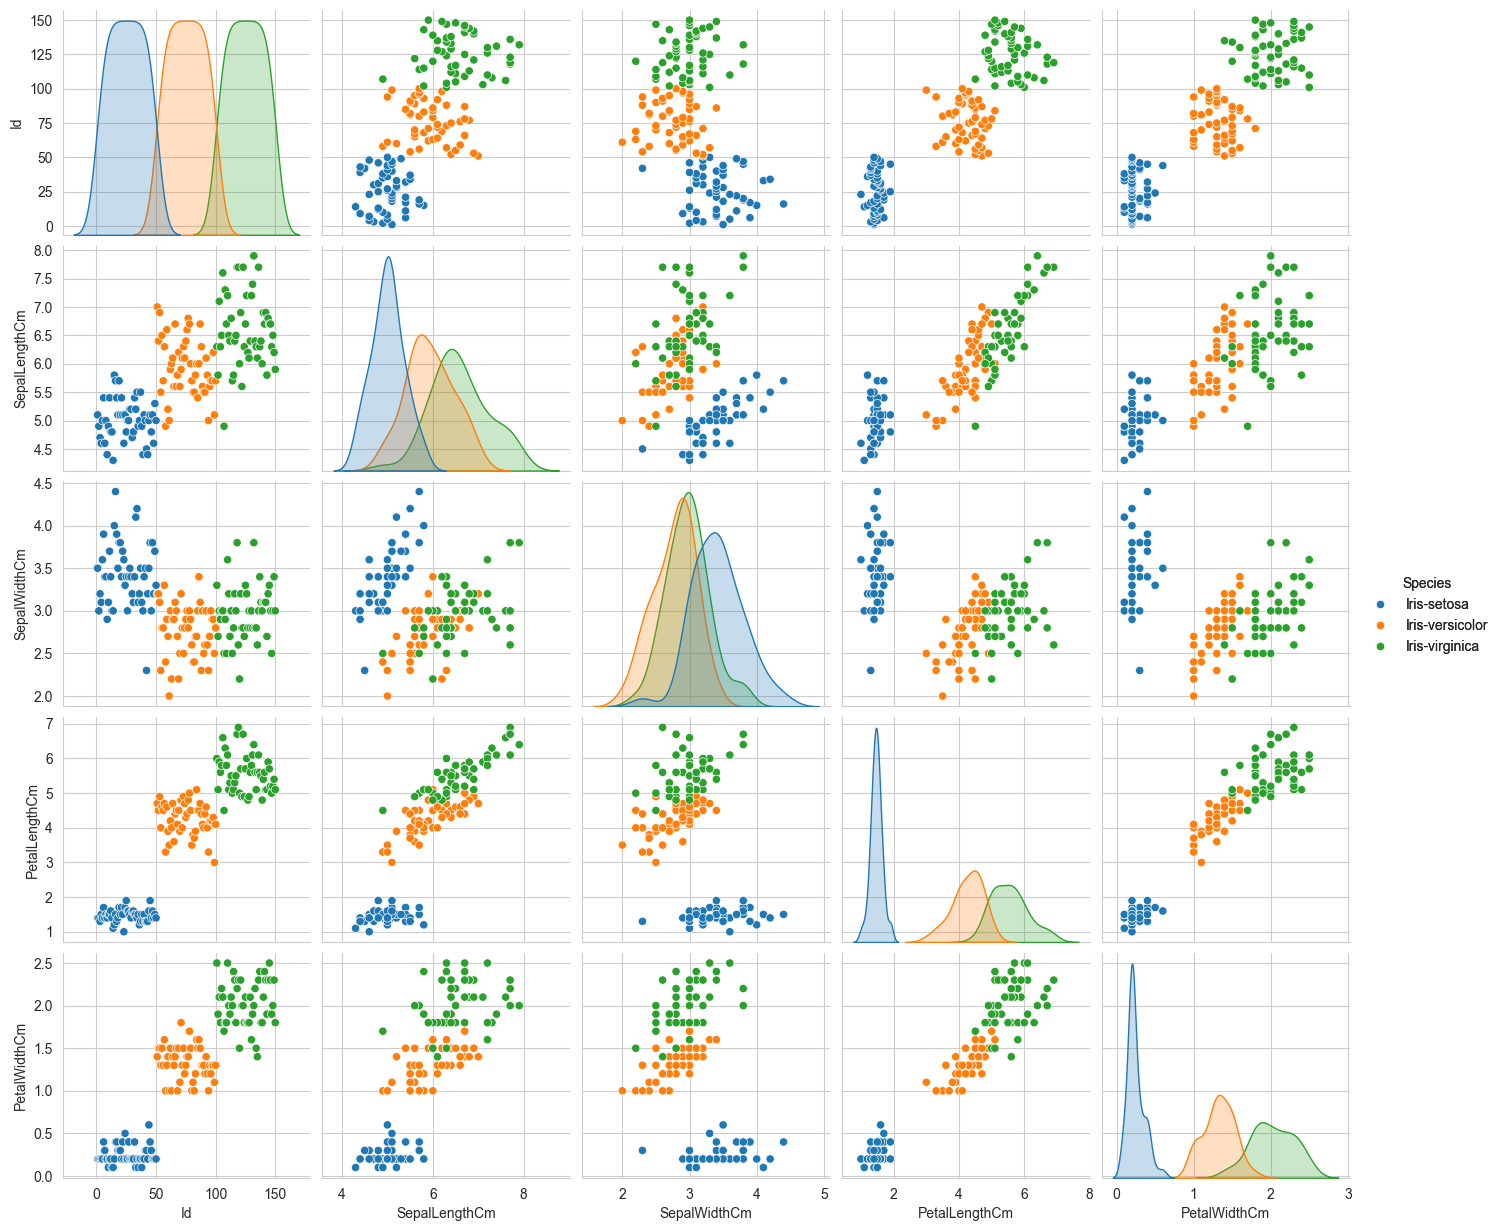

In [126]:
sns.pairplot(data, hue='Species').add_legend()

# Correlation between columns

In [127]:
num_data=data.select_dtypes(include='number').drop(['Id'], axis=1)
num_data.corr(method='pearson') # Correlation matrix for showing dependancy between columns

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


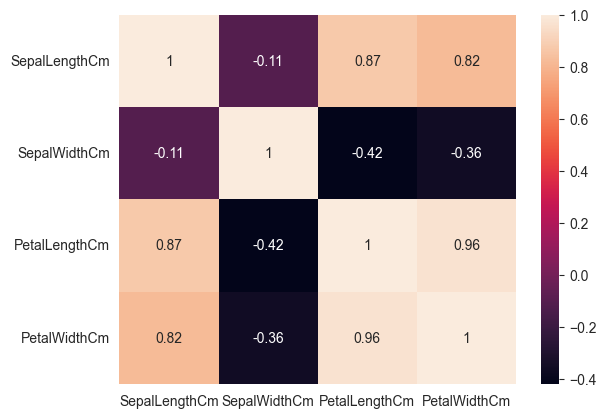

In [128]:
sns.heatmap(num_data.corr(method='pearson'),annot=True);
plt.show()

# Outlier detection

<Axes: xlabel='SepalWidthCm'>

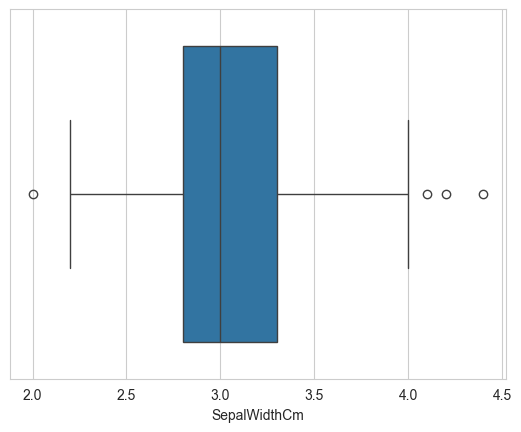

In [129]:
sns.boxplot(x='SepalWidthCm', data=data)

<Axes: xlabel='SepalLengthCm'>

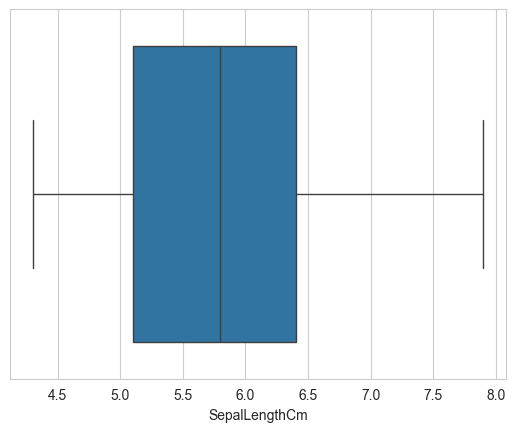

In [130]:
sns.boxplot(x='SepalLengthCm', data=data)

<Axes: xlabel='PetalWidthCm'>

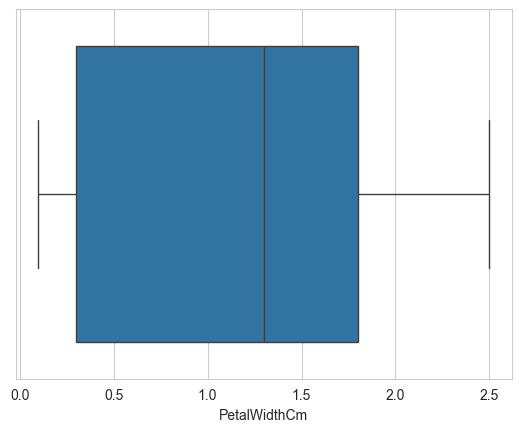

In [131]:
sns.boxplot(x='PetalWidthCm', data=data)

<Axes: xlabel='PetalLengthCm'>

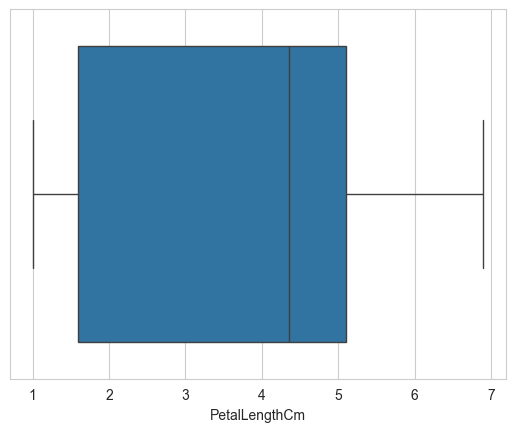

In [132]:
sns.boxplot(x='PetalLengthCm', data=data)

# Outlier removal in SepaWidthCm

Previous shape of dataset:  (150, 6)
Present shape of dataset:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

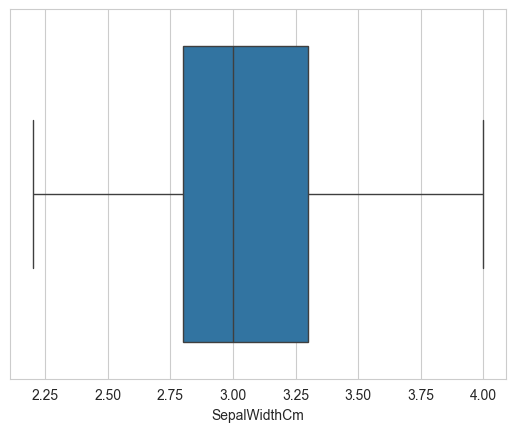

In [133]:
q1=np.percentile(data['SepalWidthCm'], 25, interpolation='midpoint') # First quartile
q3=np.percentile(data['SepalWidthCm'], 75, interpolation='midpoint') # Third quartile
iqr=q3-q1 # Interquartile range
print("Previous shape of dataset: ", data.shape)
lower=np.where(data['SepalWidthCm'] <= q1-1.5*iqr)
upper=np.where(data['SepalWidthCm'] >= q3+1.5*iqr)
data.drop(lower[0], inplace=True)
data.drop(upper[0], inplace=True)
print("Present shape of dataset: ", data.shape)
sns.boxplot(x='SepalWidthCm', data=data)

In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Splitting data into training set and test set

In [135]:
from sklearn.model_selection import train_test_split
x=data.drop(['Species'], axis=1)
y=data['Species']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [136]:
print('X train', x_train.shape)
print('y train', y_train.shape)
print('X test', x_test.shape)
print('y test', y_test.shape)

X train (116, 5)
y train (116,)
X test (30, 5)
y test (30,)


# Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lg = LogisticRegression()
lg.fit(x_train, y_train)
print('Accuracy of model: ',lg.score(x_test, y_test))
cvs = cross_val_score(lg, x_train, y_train, cv=10)
print('Accuracy of model after Cross_Val_Score: ',np.mean(cvs))

Accuracy of model:  1.0
Accuracy of model after Cross_Val_Score:  0.990909090909091


# Classification Report

In [139]:
from sklearn.metrics import classification_report
predict = lg.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

